# Data Exploration

In this notebook, the goal is to understand the structure and quality of the original *Pastel de Nata* dataset before any preprocessing or modeling.
We inspect data types, distributions, missing values, and key relationships between features and the target (`quality_class`) to guide later preprocessing and feature selection.


In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [97]:
data_dict = pd.read_csv(r'C:\Users\Lucas\Documents\NOVA IMS\Machine Learning\Final Project\Nata_Files\data_dictionary.csv')
pastel_d_nata_lrn = pd.read_csv(r'C:\Users\Lucas\Documents\NOVA IMS\Machine Learning\Final Project\Nata_Files\learn.csv', index_col=0)

### Dataset overview

The data dictionary below summarizes each variable in the *Pastel de Nata* dataset, including its type, description, and measurement unit.
This provides a high‑level understanding of what each feature represents (e.g., process parameters like `baking_duration` and `final_temperature`, ingredient‑related variables such as `sugar_content` and `salt_ratio`, and categorical fields like `origin` and `pastry_type`).


In [98]:
data_dict

,Feature,Type,Description,Unit
0,id,Numeric,Internal identifier for each record,-
1,ambient_humidity,Numeric,Kitchen ambient humidity during baking,%
2,baking_duration,Numeric,Total baking time at high temperature,minutes
3,cooling_period,Numeric,Resting time after baking before removal,minutes
4,cream_fat_content,Numeric,Fat percentage in cream used,%
5,egg_temperature,Numeric,Temperature of eggs when added to custard,°C
6,egg_yolk_count,Numeric,Number of egg yolks per batch,count
7,final_temperature,Numeric,Measured temperature at end of baking,°C
8,lemon_zest_ph,Numeric,pH of lemon zest infusion in custard,pH scale
9,notes_baker,Text,Additional notes from baker (if any),-


### Initial descriptive statistics

We begin with summary statistics for all numerical features to get a sense of their central tendency, spread, and potential outliers.
Together with the missing‑value matrix, this helps identify variables that may require imputation, transformation, or capping (for example, extremely high values for temperatures or salt ratios).


In [99]:
pastel_d_nata_lrn.describe()

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,notes_baker,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract
count,5182.000000,5199.000000,5199.000000,5176.00000,5176.000000,5176.000000,5175.000000,5174.000000,0.0,5179.000000,5181.000000,5187.000000,5178.000000,5182.000000
mean,59.980316,26.979804,31.817850,98.41306,70.812403,10.498068,223.577198,3.218902,NaN,223.541031,216.413241,55.882034,54.003418,5.307159
std,11.616151,8.320079,14.427143,1.99735,35.439831,1.257709,85.258779,0.165909,NaN,84.482034,39.533116,34.867144,47.213038,1.483175
min,40.000000,14.000000,0.000000,91.90000,12.000000,8.000000,31.000000,2.700000,NaN,58.000000,114.000000,11.550000,6.000000,2.200000
25%,50.000000,21.000000,25.000000,97.10000,44.000000,10.000000,164.000000,3.100000,NaN,166.000000,192.000000,37.910000,18.000000,4.300000
50%,60.000000,25.000000,31.000000,98.40000,67.000000,10.000000,226.000000,3.200000,NaN,227.000000,209.000000,47.170000,30.000000,5.100000
75%,70.000000,30.000000,39.000000,99.80000,92.000000,11.000000,284.000000,3.300000,NaN,283.000000,231.000000,64.610000,80.675000,6.000000
max,80.000000,89.000000,105.000000,107.30000,575.000000,15.000000,722.000000,4.000000,NaN,713.000000,499.000000,640.320000,656.500000,20.800000


In [100]:
pastel_d_nata_lrn.isna().sum().sort_values(ascending=False)

notes_baker          5200
pastry_type          1789
origin                161
lemon_zest_ph          26
final_temperature      25
cream_fat_content      24
egg_temperature        24
egg_yolk_count         24
sugar_content          22
oven_temperature       21
preheating_time        19
vanilla_extract        18
ambient_humidity       18
salt_ratio             13
baking_duration         1
cooling_period          1
quality_class           1
dtype: int64

In [101]:
pastel_d_nata_lrn = pastel_d_nata_lrn[pastel_d_nata_lrn['quality_class'].isna()==False]

Checking whether there are any dependancies between different missing values

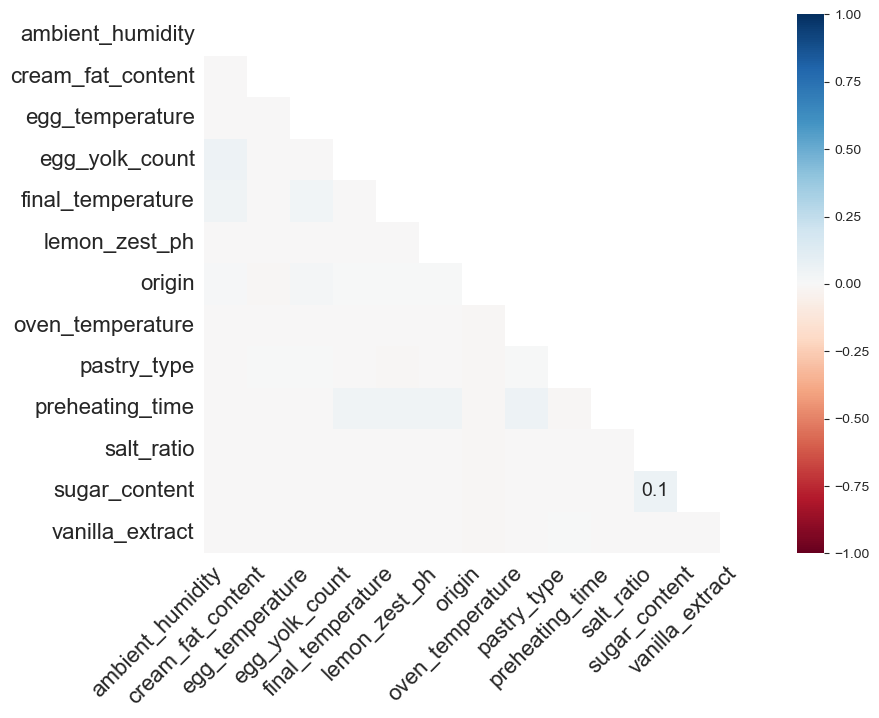

In [102]:
fig, ax = plt.subplots(figsize=(9, 7))
msno.heatmap(pastel_d_nata_lrn, ax=ax)
plt.show()

### Distributions off various features

The histograms show the empirical distribution and highlight potential skewness and outliers.
These insights will later inform decisions about transformations (such as scaling or power transforms) and whether capping or trimming extreme values is appropriate.


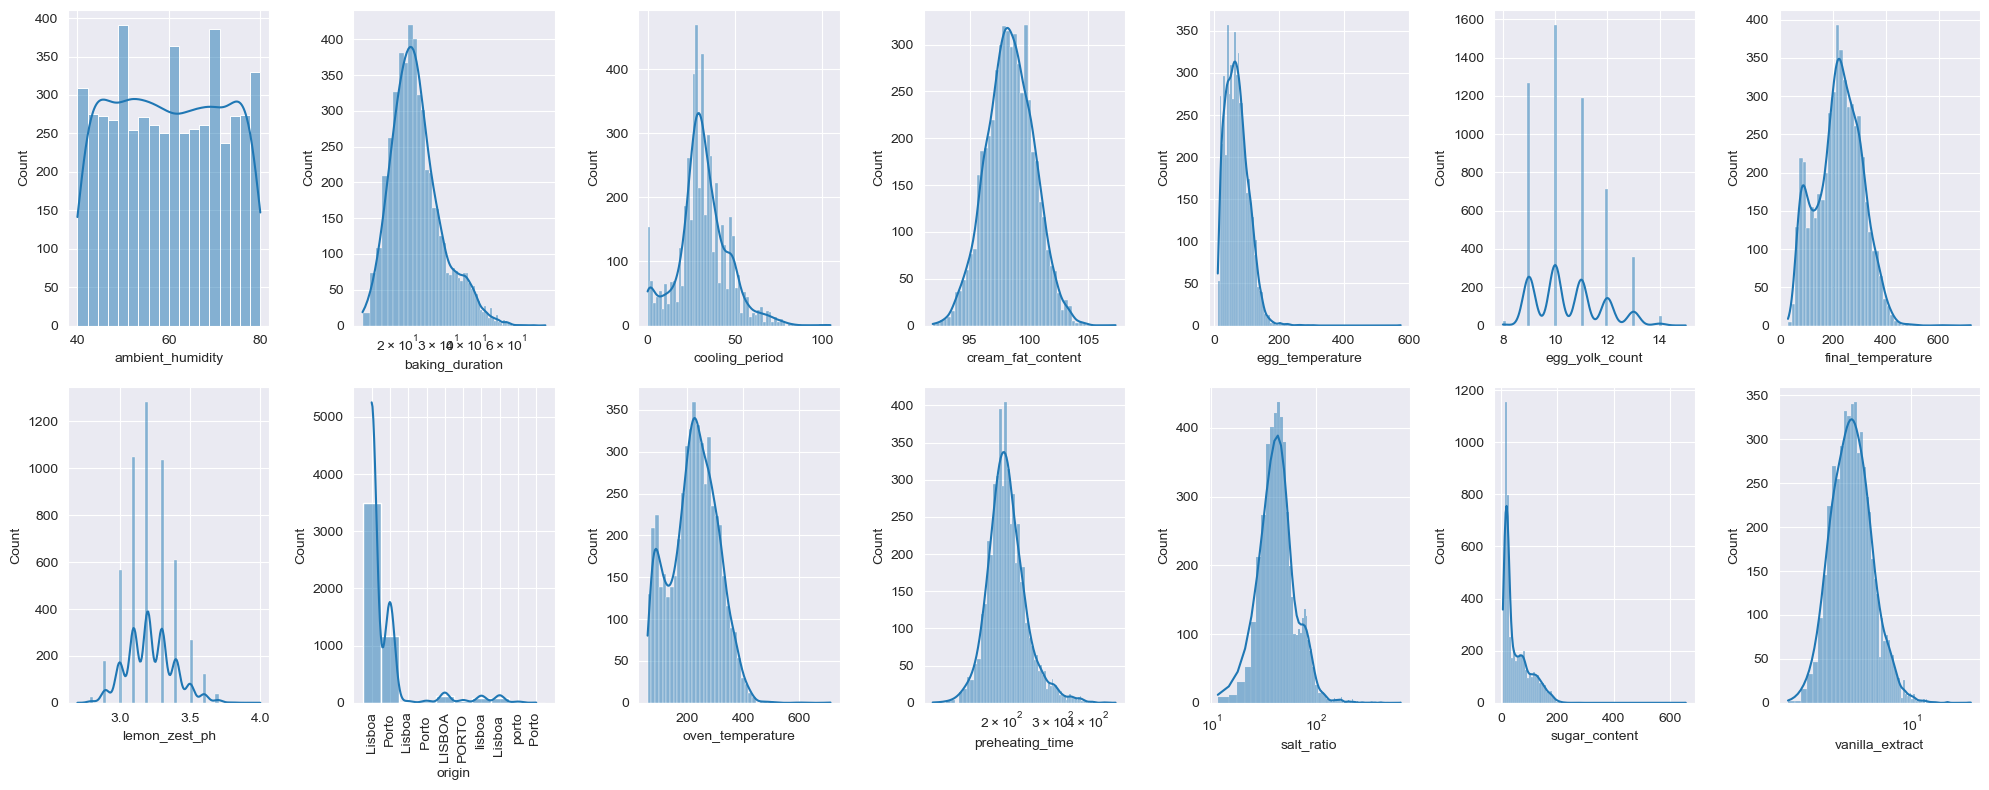

In [103]:
explore = pastel_d_nata_lrn.drop(['notes_baker','pastry_type', 'quality_class'], axis=1)

fig, axes = plt.subplots(2, 7, figsize=(20, 8))
axes = axes.flatten()

for ax, col in zip(axes, explore.columns):
    sns.histplot(explore[col].dropna(), ax=ax, kde=True)

axes[1].set_xscale('log')
#axes[2].set_xscale('log')
#axes[4].set_xscale('log')
#axes[6].set_xscale('log')
#axes[9].set_xscale('log')
axes[10].set_xscale('log')
axes[11].set_xscale('log')
#axes[12].set_xscale('log')
axes[13].set_xscale('log')

#will apply z-score scaling for cream_fat_content and lemon_zest_ph, min-max scaling for ambient_humidity and egg_yolk_count whereas we will be utilizing the box-cox scaling for logarithmically scaled plots and robust-scaling for the rest of the skewed data.

axes[8].set_xticks(range(explore.origin.nunique()))
axes[8].set_xticklabels(axes[8].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

We will apply z-score scaling for cream_fat_content and lemon_zest_ph, min-max scaling for egg_yolk_count whereas we will be utilizing the box-cox scaling for logarithmically scaled plots and robust-scaling for the rest of the skewed data.
___

### Standardizing origin information

The `origin` column appears in text form with multiple variants for Lisbon and Porto (for example, “Lisboa”, “Lisbon”).
To make this feature usable in modeling, we normalize these entries to Lisbon and Porto, ensuring a consistent representation across both learning and prediction datasets.

In [104]:
origin_update = []
for city in pastel_d_nata_lrn['origin']:
    if 'lisboa' in str(city).lower() or 'lisbon' in str(city).lower():
        city='Lisbon'
        origin_update.append(city)
    elif 'porto' in str(city).lower():
        city='Porto'
        origin_update.append(city)
    else:
        origin_update.append(city)
pastel_d_nata_lrn.origin = origin_update
explore.origin=origin_update

#### Extreme outlier handling

Inspecting the tails of the most skewed distributions helps determine whether extreme values are genuine observations or likely artefacts that should be capped.
By closely examining these extremes, we can decide which features require clipping and how aggressive the thresholds should be, balancing robustness against information loss.


In [105]:
pastel_d_nata_lrn.sort_values('vanilla_extract', ascending=False)[['vanilla_extract','quality_class']].head()

,vanilla_extract,quality_class
id,,
4327,20.8,OK
2695,20.1,KO
2386,15.7,KO
4515,15.6,KO
2849,15.5,OK


In [106]:
pastel_d_nata_lrn.sort_values('baking_duration', ascending=False)[['baking_duration','quality_class']]

,baking_duration,quality_class
id,,
2227,89.0,KO
975,79.0,KO
1843,77.0,KO
331,73.0,KO
4776,71.0,KO
...,...,...
18,14.0,OK
1477,14.0,OK
685,14.0,OK


In [107]:
pastel_d_nata_lrn.sort_values('salt_ratio', ascending=False)[['salt_ratio','quality_class']].head()

,salt_ratio,quality_class
id,,
2695,640.32,KO
651,636.67,KO
2525,472.03,KO
3223,431.76,KO
2897,419.47,OK


In [108]:
pastel_d_nata_lrn.sort_values('sugar_content', ascending=False)[['sugar_content','quality_class']].head()

,sugar_content,quality_class
id,,
58,656.5,OK
1782,332.5,OK
3736,270.9,OK
558,262.1,OK
595,229.7,KO


In [109]:
pastel_d_nata_lrn.sort_values('egg_temperature', ascending=False)[['egg_temperature','quality_class']].head(9)

,egg_temperature,quality_class
id,,
1272,575.0,KO
5025,304.0,KO
3142,287.0,KO
3129,270.0,KO
5026,260.0,KO
3717,255.0,KO
3919,237.0,OK
5186,232.0,KO
4806,227.0,OK


Based on the largest observed values, the long right tails still exhibit considerable variation in `quality_class`, suggesting that many extreme points are informative rather than pure noise.
To reduce skewness while preserving this information, we experiment with minimally clipping only the most extreme upper values and then reassess how this affects the overall shape of the distributions.


In [110]:
explore_new=explore.drop(explore.egg_temperature.nlargest(6).index)
explore_new=explore_new.drop(explore_new.sugar_content.nlargest(4).index)
explore_new=explore_new.drop(explore_new.salt_ratio.nlargest(5).index)
explore_new=explore_new.drop(explore_new.vanilla_extract.nlargest(5).index)
explore_new=explore_new.drop(explore_new.baking_duration.nlargest(10).index)

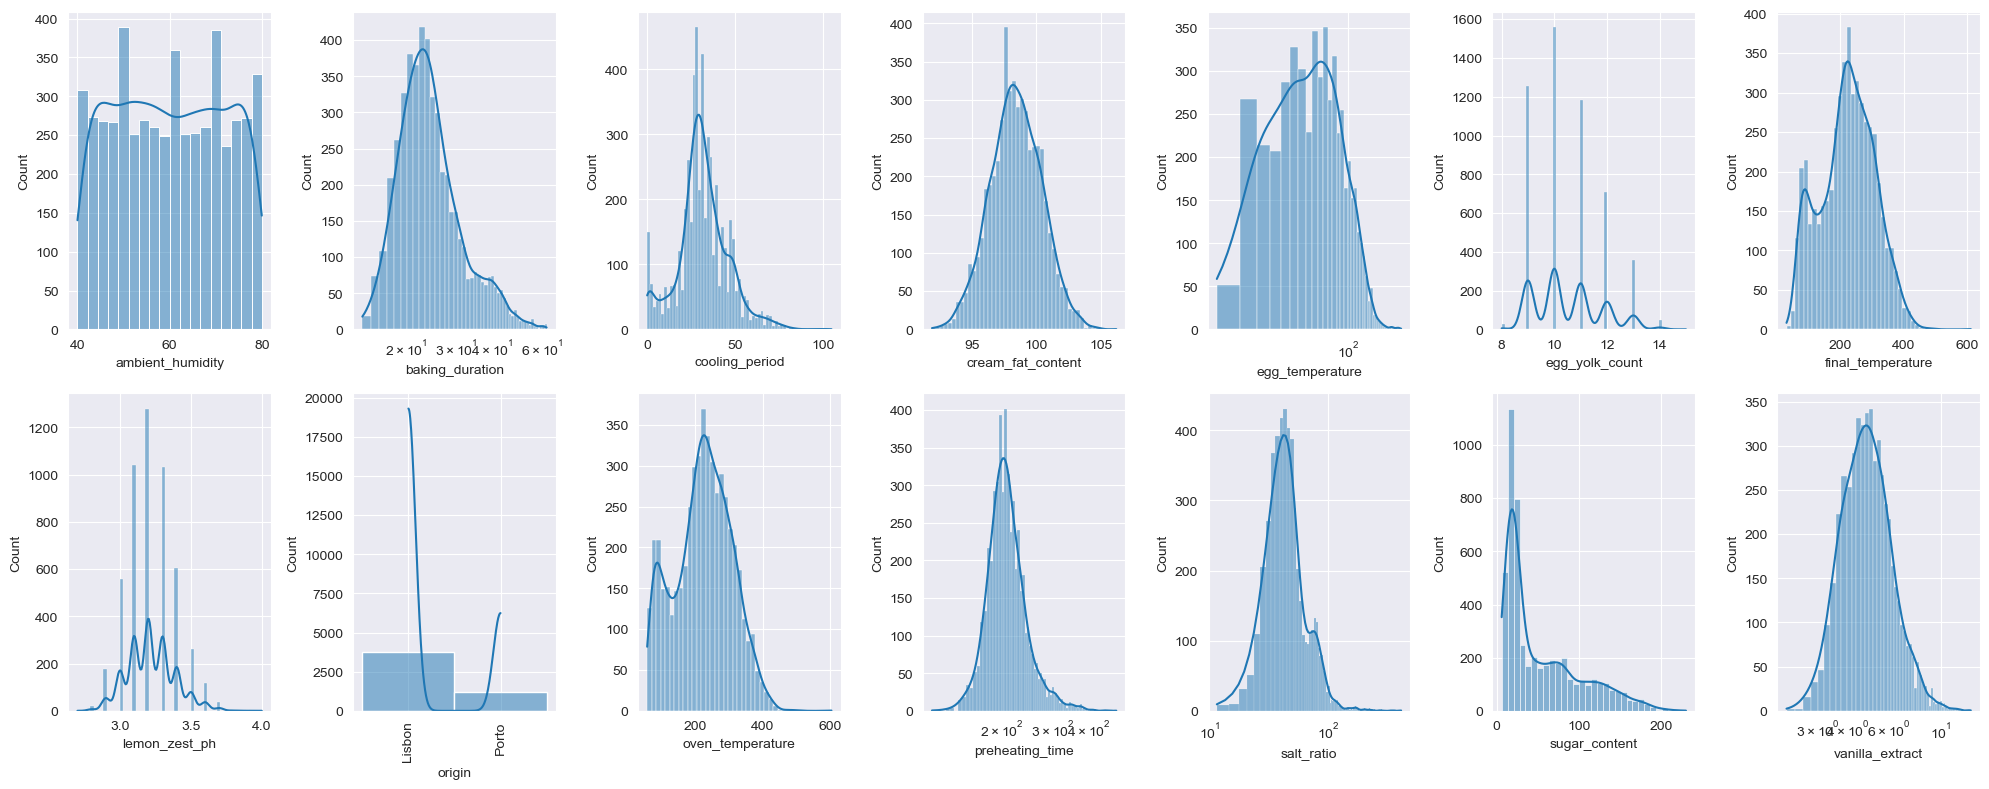

In [114]:
fig, axes = plt.subplots(2, 7, figsize=(20, 8))
axes = axes.flatten()

for ax, col in zip(axes, explore_new.columns):
    sns.histplot(explore_new[col].dropna(), ax=ax, kde=True)

axes[1].set_xscale('log')
axes[4].set_xscale('log')

axes[10].set_xscale('log')
axes[11].set_xscale('log')

axes[13].set_xscale('log')


axes[8].set_xticks(range(explore_new.origin.nunique()))
axes[8].set_xticklabels(axes[8].get_xticklabels(), rotation=90)
#plt.savefig('Nata_Files/imgs/distributions')
plt.tight_layout()
plt.show()

After applying upper caps to the selected features, the resulting histograms appear noticeably closer to a symmetric shape when viewed on a log scale.
This indicates that capping has successfully reduced the influence of extreme outliers and produced distributions that are more suitable for downstream modeling and scaling.


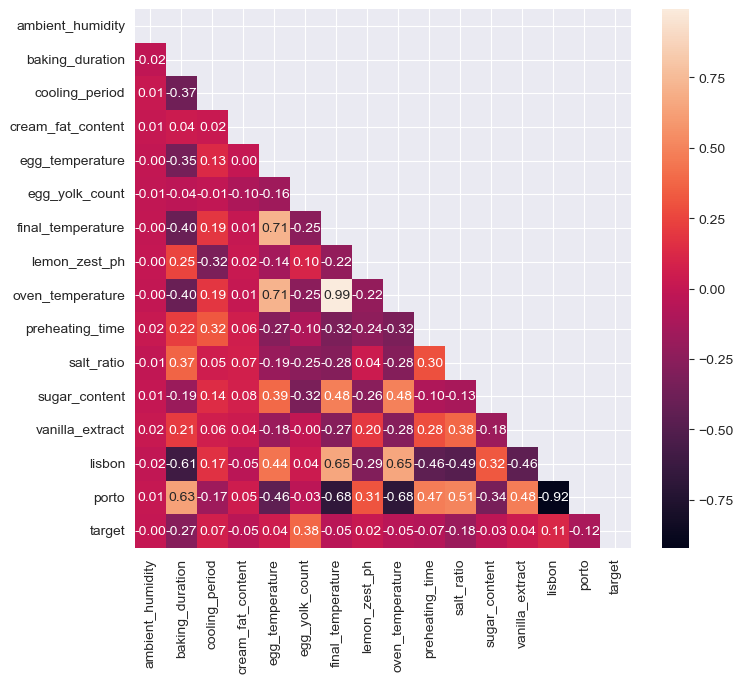

In [112]:
lisbon_dummy = [1 if city == 'Lisbon' else 0 for city in pastel_d_nata_lrn['origin']]
porto_dummy = [1 if city == 'Porto' else 0 for city in pastel_d_nata_lrn['origin']]
target_bin = [1 if trgt == 'OK' else 0 for trgt in pastel_d_nata_lrn['quality_class']]
explore_wd = pastel_d_nata_lrn.drop(['notes_baker','pastry_type', 'origin','quality_class'], axis=1)
explore_wd['lisbon'] = lisbon_dummy
explore_wd['porto'] = porto_dummy
explore_wd['target'] = target_bin

exploration_correlation = explore_wd.corr()
mask = np.triu(exploration_correlation)
fig, ax = plt.subplots(figsize=(8, 7))
hm = sns.heatmap(exploration_correlation,ax=ax, mask=mask,annot=True, fmt='.2f')
#hm.figure.savefig('Nata_Files/imgs/heatmap-full-combo')
plt.show()

The correlation heatmap reveals a very strong positive relationship among the three temperature‑related features, confirming that they carry largely overlapping information.
This multicollinearity suggests that at least one of these variables can be removed in later steps without significantly reducing the predictive signal in the dataset.


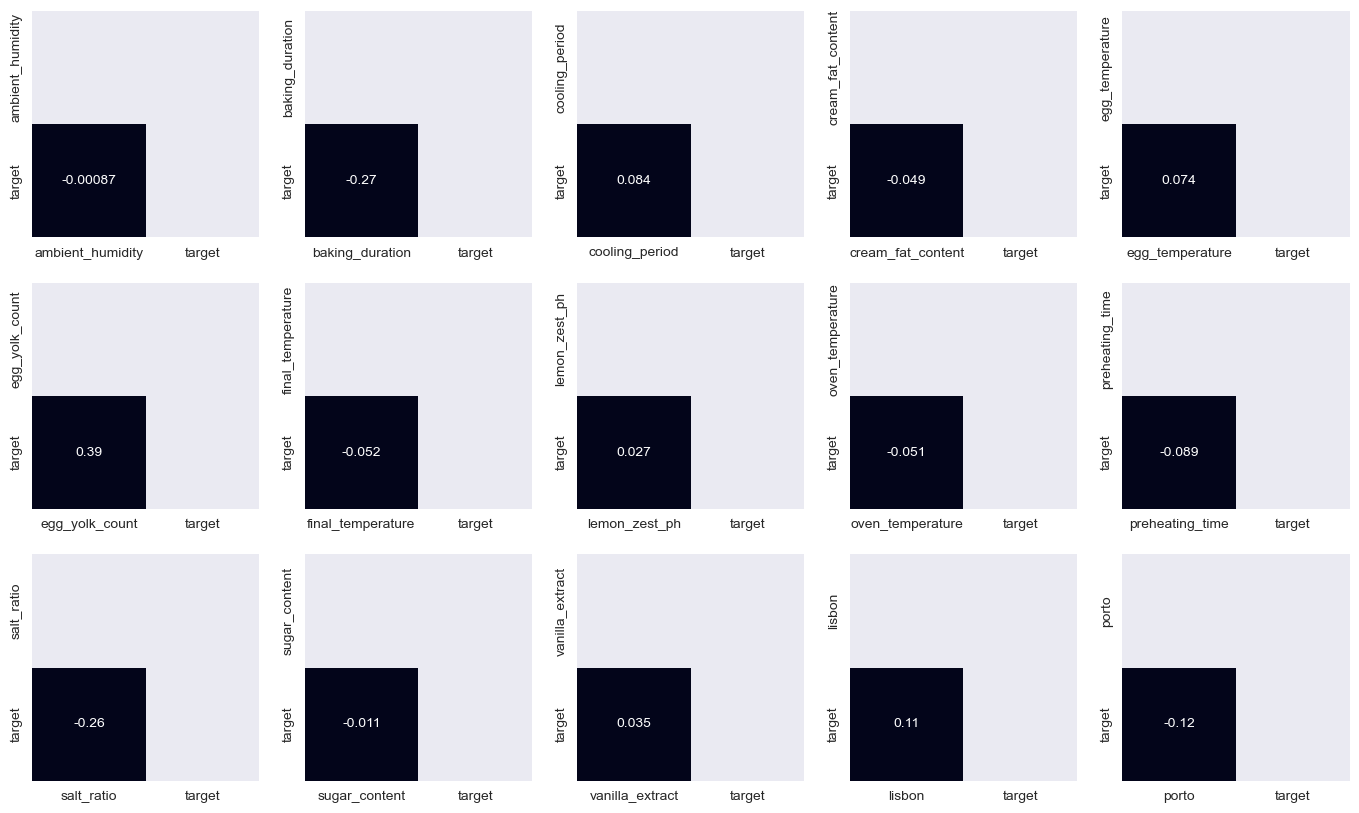

In [113]:
fig, axes = plt.subplots(3, 5, figsize=(17, 10))
axes = axes.flatten()

for ax, col in zip(axes, explore_wd.drop('target',axis=1).columns):
    masks = np.triu(np.empty((2,2)))
    ax.grid(False)
    sns.heatmap(explore_wd[[col, 'target']].corr('spearman'), ax=ax, annot=True, mask=masks, cbar=False)
#plt.savefig('Nata_Files/imgs/heatmaps-target')
plt.show()

Individual heatmaps of each feature against the target highlight `egg_yolk_count` and `baking_duration` as particularly influential predictors.
In contrast, the origin‑related variable shows only weak association with the target, indicating that bakery location is unlikely to play a major role and may safely be deprioritized in the final feature set.
